## Project Details

The purpose of this project is to cluster adults using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


The dataset is part of "Adult". You can find more information here: https://archive.ics.uci.edu/ml/datasets/adult.
The classification problem is whether they earn more than 50,000$ or not.





In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [ ]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only

import pandas as pd    
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method


According to the graph, we can see that the elbow starts at 2. Therefore, 2 is the optimal number of clusters.


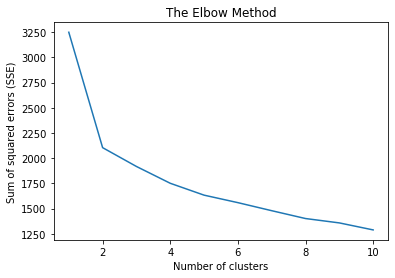

In [ ]:


# read the dataset
dataset = pd.read_csv('clusteringdata.csv')

# iterate over all the attributes(columns) from the dataset
for attribute in dataset.columns:
    # check if the datatype of the attribute is an object
    if dataset.dtypes[attribute] == np.object:
        # use factorize function to represent string values as numeric values
        dataset[attribute], _ = pd.factorize(dataset[attribute])
        
# min max normalization
dataset = (dataset-dataset.min())/(dataset.max()-dataset.min())

# variable X contains all the attributes except 'Class'
X = dataset.iloc[:,0:14]   

# variable Y contains the target 'Class'
Y = dataset.iloc[:,14:15]

# create empty list to store the sum of squared error 
sse = []

# iterate from 1 to 10 clusters
for k in range(1, 11):
    # set kmeans for the kth number of clusters
    model = KMeans(n_clusters = k)
    # pass the data to the kmeans model
    model.fit(X)
    # store the sum of squared error in sse
    sse.append(model.inertia_)
    
print('\nAccording to the graph, we can see that the elbow starts at 2. Therefore, 2 is the optimal number of clusters.')
    
# plot the graph
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('The Elbow Method');



### Task 1-b: Visualization for K-Means Clustering

In [ ]:


### Important!!!
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)



Cluster Centers:
[[2.72466471e-01 3.49538768e-01 1.64784960e-01 2.21000582e-01
  6.00639907e-01 2.31820826e-01 2.97307405e-01 4.12390925e-01
  6.65357766e-02 1.00000000e+00 4.32451968e-03 2.18016474e-02
  3.61185312e-01 3.34273057e-02]
 [3.05478288e-01 3.34203180e-01 1.71797078e-01 2.29538374e-01
  6.08609459e-01 1.54772019e-01 3.62392281e-01 2.53865760e-01
  4.36491079e-02 8.93729535e-15 1.23487556e-02 4.65238228e-02
  4.24787162e-01 3.24597521e-02]]


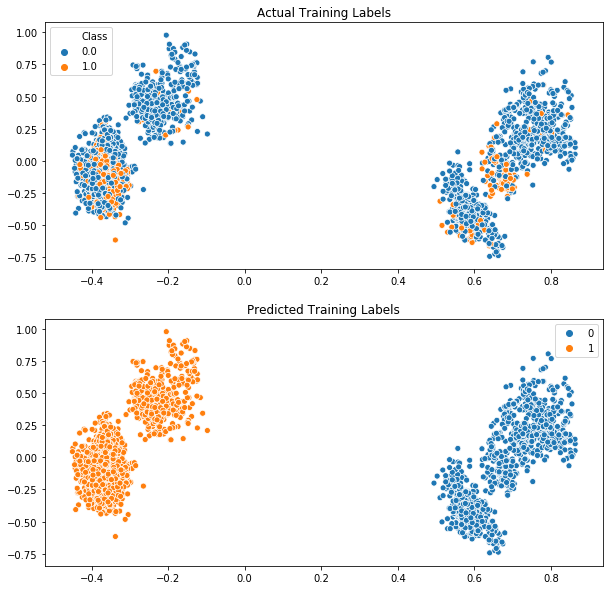

In [ ]:


# Import PCA
from sklearn.decomposition import PCA

# set to 2 dimensions
pca = PCA(n_components = 2)

# Create the KMeans model

# set 2 clusters for kmeans model
model = KMeans(n_clusters = 2)

# pass the training data to the kmeans model
model.fit(X_train)

# Compute cluster centers and predict cluster index for each sample 

# compute cluster centers
print('Cluster Centers:')
print(model.cluster_centers_)

# predict training data
train_pred = model.predict(X_train)

# Model and fit the data to the PCA model
X_train_pca = pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

plt.figure(figsize=(10, 10))

# scatter plot for actual training labels
plt.subplot(211)
plt.title('Actual Training Labels')
sns.scatterplot(x = x, y = y, hue = Y_train.Class)

# scatter plot for predicted training labels
plt.subplot(212)
plt.title('Predicted Training Labels')
sns.scatterplot(x = x, y = y, hue = train_pred);



Visualizing the predicted testing labels versus actual testing labels. Use the trained model in previous step.

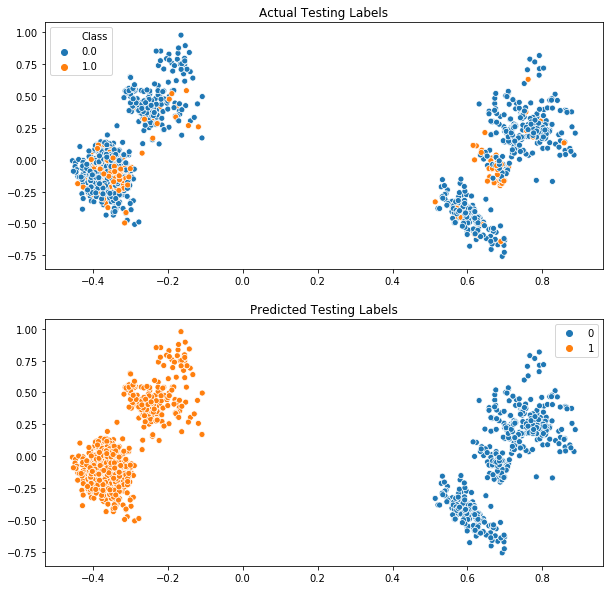

In [ ]:


# predict cluster index for each sample 

# predict testing data
test_pred = model.predict(X_test)

# Model and fit the data to the PCA model
X_test_pca = pca.fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

plt.figure(figsize=(10, 10))

# scatter plot for actual testing labels
plt.subplot(211)
plt.title('Actual Testing Labels')
sns.scatterplot(x = x, y = y, hue = Y_test.Class)

# scatter plot for predicted testing labels
plt.subplot(212)
plt.title('Predicted Testing Labels')
sns.scatterplot(x = x, y = y, hue = test_pred);



Evaluation of your clustering model and printing confusion matrix.

In [ ]:


# print the confusion matrix for predicted training labels and actual training labels
print('confusion matrix (training dataset):')
print(confusion_matrix(Y_train, train_pred))

# print the confusion matrix for predicted testing labels and actual testing labels
print('\nconfusion matrix (testing dataset):')
print(confusion_matrix(Y_test, test_pred))



confusion matrix (training dataset):
[[1009 1637]
 [ 137  717]]

confusion matrix (testing dataset):
[[424 709]
 [ 59 308]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In [ ]:

# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score

## Calculate pairwise distance matrix for X_train
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html
pdm_train = pairwise_distances(X_train, metric='euclidean')
print('Pairwise Distance Matrix:')
#np.set_printoptions(threshold=np.inf)
print(np.matrix(pdm_train))

## Model and fit the training data to the AgglomerativeClustering model
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
## complete linkage + cosine
complete_cos = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')
complete_cos_pred = complete_cos.fit_predict(X_train)
complete_cos_f1 = f1_score(Y_train, complete_cos_pred, average='macro')
print("Confusion Matrix for complete linkage + cosine:")
print(confusion_matrix(Y_train,complete_cos_pred))

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
complete_euc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete').fit(X)
complete_euc_pred = complete_euc.fit_predict(X_train)
complete_euc_f1 = f1_score(Y_train, complete_euc_pred, average='macro')
print("Confusion Matrix for complete linkage + euclidean:")
print(confusion_matrix(Y_train,complete_euc_pred))

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
complete_man = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete').fit(X)
complete_man_pred = complete_man.fit_predict(X_train)
complete_man_f1 = f1_score(Y_train, complete_man_pred, average='macro')
print("Confusion Matrix for complete linkage + manhattan:")
print(confusion_matrix(Y_train,complete_man_pred))

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
average_cos = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average').fit(X)
average_cos_pred = average_cos.fit_predict(X_train)
average_cos_f1 = f1_score(Y_train, average_cos_pred, average='macro')
print("Confusion Matrix for average linkage + cosine:")
print(confusion_matrix(Y_train,average_cos_pred))

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
average_euc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average').fit(X)
average_euc_pred = average_euc.fit_predict(X_train)
average_euc_f1 = f1_score(Y_train, average_euc_pred, average='macro')
print("Confusion Matrix for average linkage + euclidean:")
print(confusion_matrix(Y_train,average_euc_pred))

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
average_man = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average').fit(X)
average_man_pred = average_man.fit_predict(X_train)
average_man_f1 = f1_score(Y_train, average_man_pred, average='macro')
print("Confusion Matrix for average linkage + manhattan:")
print(confusion_matrix(Y_train,average_man_pred))

print("F1-score for complete linkage + cosine", complete_cos_f1)
print("F1-score for complete linkage + euclidean", complete_euc_f1)
print("F1-score for complete linkage + manhattan", complete_man_f1)
print("F1-score for average linkage + cosine", average_cos_f1)
print("F1-score for average linkage + euclidean", average_euc_f1)
print("F1-score for average linkage + manhattan", average_man_f1)



Pairwise Distance Matrix:
[[0.00000000e+00 1.43451874e+00 1.10275830e+00 ... 9.19680664e-01
  1.58513267e+00 1.04974331e+00]
 [1.43451874e+00 0.00000000e+00 1.59945976e+00 ... 1.53409700e+00
  1.69403999e+00 1.49505270e+00]
 [1.10275830e+00 1.59945976e+00 0.00000000e+00 ... 4.92499123e-01
  1.26549866e+00 9.75937537e-01]
 ...
 [9.19680664e-01 1.53409700e+00 4.92499123e-01 ... 2.10734243e-08
  1.19300538e+00 7.57811156e-01]
 [1.58513267e+00 1.69403999e+00 1.26549866e+00 ... 1.19300538e+00
  0.00000000e+00 9.73743545e-01]
 [1.04974331e+00 1.49505270e+00 9.75937537e-01 ... 7.57811156e-01
  9.73743545e-01 0.00000000e+00]]
Confusion Matrix for complete linkage + cosine:
[[1637 1009]
 [ 717  137]]
Confusion Matrix for complete linkage + euclidean:
[[2512  134]
 [ 847    7]]
Confusion Matrix for complete linkage + manhattan:
[[1638 1008]
 [ 717  137]]
Confusion Matrix for average linkage + cosine:
[[2645    1]
 [ 854    0]]
Confusion Matrix for average linkage + euclidean:
[[2638    8]
 [ 853

## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

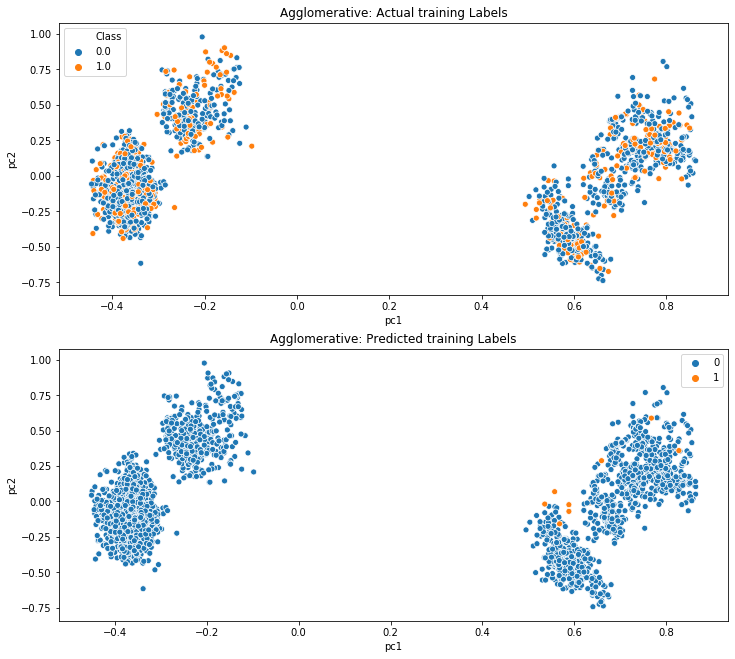

In [ ]:


# Visualize the predicted training labels versus actual training labels. 
# The best performed model was average linkage + euclidean which is the one with highest f1-score which
# is  0.4310104676325485.

# Reducing the acttributes to 2 using Principa Component Analysis
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(X_train)
X_pca = pd.DataFrame(data = X_pca, columns = ['pc1', 'pc2'])

x = X_pca.iloc[:, 0]
y = X_pca.iloc[:, 1]
plt.figure(figsize=(12, 11))
# scatter plot for actual testing labels
plt.subplot(211)
plt.title('Agglomerative: Actual training Labels')
sns.scatterplot(x = x, y = y, hue = Y_train.Class)

# scatter plot for predicted testing labels
plt.subplot(212)
plt.title('Agglomerative: Predicted training Labels')
sns.scatterplot(x = x, y = y, hue = average_euc_pred);


# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

Pairwise Distance Matrix for X:
[[0.00000000e+00 4.38640065e-01 5.54912042e-01 ... 1.04489580e+00
  5.08524212e-01 1.27110129e+00]
 [4.38640065e-01 1.49011612e-08 5.37407073e-01 ... 8.98356675e-01
  7.29827155e-01 1.27257076e+00]
 [5.54912042e-01 5.37407073e-01 0.00000000e+00 ... 7.00823078e-01
  4.48419124e-01 1.18195180e+00]
 ...
 [1.04489580e+00 8.98356675e-01 7.00823078e-01 ... 0.00000000e+00
  8.38745830e-01 1.15803616e+00]
 [5.08524212e-01 7.29827155e-01 4.48419124e-01 ... 8.38745830e-01
  1.49011612e-08 1.19721639e+00]
 [1.27110129e+00 1.27257076e+00 1.18195180e+00 ... 1.15803616e+00
  1.19721639e+00 0.00000000e+00]]


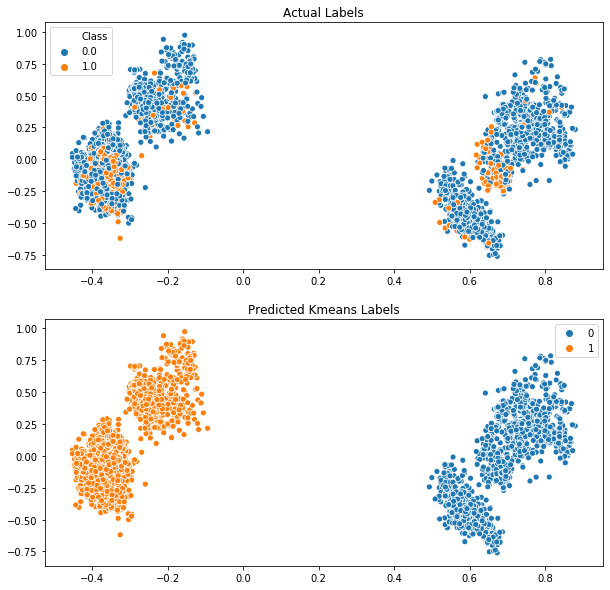

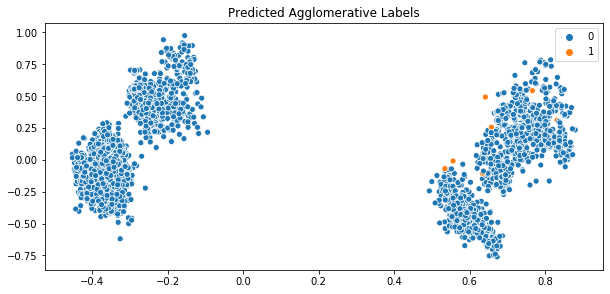

In [ ]:


### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
Model = KMeans(n_clusters = 2)
label_kmean = Model.fit_predict(X)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm_train = pairwise_distances(X, metric='euclidean')
print('Pairwise Distance Matrix for X:')
print(np.matrix(pdm_train))

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
average_euc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average').fit(X)
avg_euc_pred_X = average_euc.fit_predict(X)

### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = pca.fit_transform(X)

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_pca[:, 0]
y = X_pca[:, 1]

plt.figure(figsize=(10, 10))

plt.subplot(211)
plt.title('Actual Labels')
sns.scatterplot(x = x, y = y, hue = Y.Class)

plt.subplot(212)
plt.title('Predicted Kmeans Labels')
sns.scatterplot(x = x, y = y, hue = label_kmean)

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.title('Predicted Agglomerative Labels')
sns.scatterplot(x = x, y = y, hue = avg_euc_pred_X);



## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

In [ ]:


print("Agglomerative: Confusion Matrix for average linkage + euclidean:")
print(confusion_matrix(Y,avg_euc_pred_X))
print("K-Means: Confusion Matrix for 2 clusters:")
print(confusion_matrix(Y,label_kmean))

print('')
print('Agglomerative Classification Report:')
print(classification_report(Y, avg_euc_pred_X))
print('K-Means Classification Report:')
print(classification_report(Y, label_kmean))




Agglomerative: Confusion Matrix for average linkage + euclidean:
[[3773    6]
 [1220    1]]
K-Means: Confusion Matrix for 2 clusters:
[[1433 2346]
 [ 196 1025]]

Agglomerative Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86      3779
         1.0       0.14      0.00      0.00      1221

    accuracy                           0.75      5000
   macro avg       0.45      0.50      0.43      5000
weighted avg       0.61      0.75      0.65      5000

K-Means Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.38      0.53      3779
         1.0       0.30      0.84      0.45      1221

    accuracy                           0.49      5000
   macro avg       0.59      0.61      0.49      5000
weighted avg       0.74      0.49      0.51      5000

